# Experiments for image encoding evaluation

## Setup

### Google Drive setup

In [ ]:
DRIVE_MOUNT_PATH = "/content/drive"
DRIVE_WORK_DIR = "MyDrive/Colab Notebooks/GEQIE"

try:
    from google.colab import drive
    print("Environment is Google Colab.")
    WORK_DIR = f"{DRIVE_MOUNT_PATH}/{DRIVE_WORK_DIR}"

    print(f"Mounting Google Drive '{WORK_DIR}'...")
    drive.mount(DRIVE_MOUNT_PATH)

    try:
        import geqie
        print("Dependencies already installed.")
    except:
        print("Installing dependencies...")
        ! uv pip install -e .
        ! uv pip install -r experiments/requirements/requirements.in
except Exception:
    print("Environment is not Google Colab... skipping.")

### Imports

In [ ]:
import os
from pathlib import Path

In [2]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tqdm import tqdm

import geqie
from geqie.encodings import frqi, ifrqi, mcqi, ncqi, neqr, qrci, qualpi

### Constants

In [21]:
CURRENT_PATH = Path(os.path.abspath('.'))

GRAYSCALE_PATH = CURRENT_PATH.parent / "assets" / "test_images" / "grayscale"
GRAYSCALE_METHODS = [
    frqi,
    neqr,
]


RGB_PATH = CURRENT_PATH.parent / "assets" / "test_images" / "rgb"
RGB_METHODS = [
    ifrqi,
    mcqi,
]

In [4]:
GRAYSCALE_IMAGE_PATHS = sorted(GRAYSCALE_PATH.glob("*.png"))
RGB_IMAGE_PATHS = sorted(RGB_PATH.glob("*.png"))

### Helpers

In [18]:
def plot_images_side_by_side(original, retrieved):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].set_title('Original Image')
    axes[0].imshow(original, cmap='gray' if original.ndim == 2 else None)
    axes[0].axis('off')

    axes[1].set_title('Retrieved Image')
    axes[1].imshow(retrieved, cmap='gray' if retrieved.ndim == 2 else None)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

## Experiment 1: Image Reconstruction Quality

  0%|          | 0/7 [00:00<?, ?it/s]

Method: geqie.encodings.frqi, Image: full_white.png


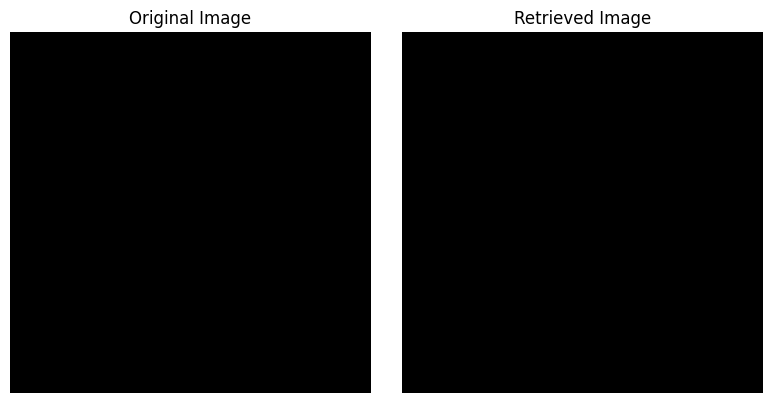

 14%|█▍        | 1/7 [00:00<00:00,  6.67it/s]

Method: geqie.encodings.frqi, Image: test_2x4.png


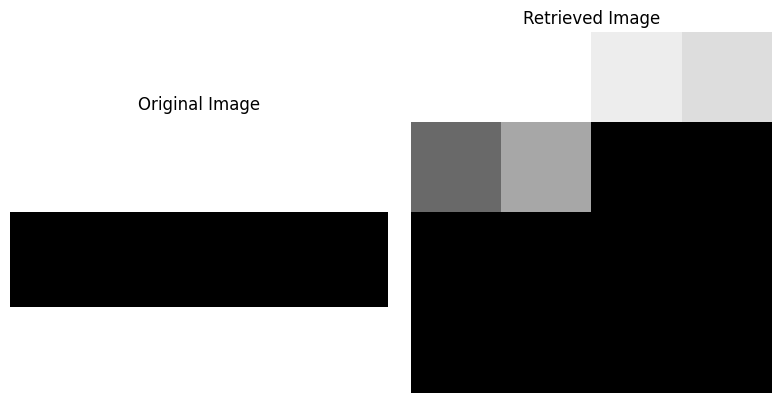

 29%|██▊       | 2/7 [00:00<00:00,  6.82it/s]

Method: geqie.encodings.frqi, Image: test_flag_4x4.png


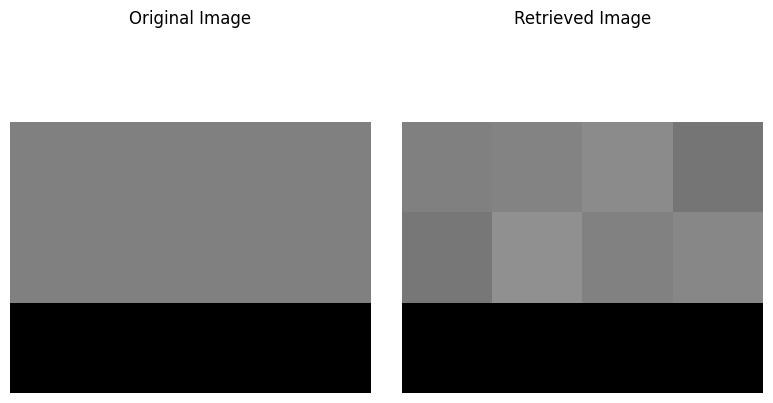

 43%|████▎     | 3/7 [00:00<00:00,  6.64it/s]

Method: geqie.encodings.frqi, Image: test_image.png


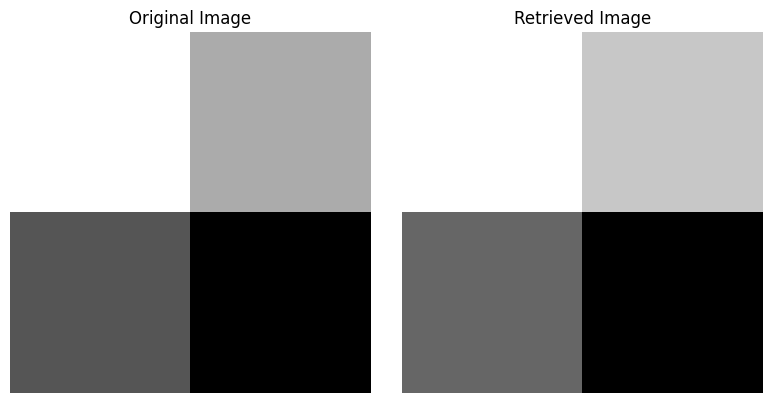

 57%|█████▋    | 4/7 [00:00<00:00,  6.67it/s]

Method: geqie.encodings.frqi, Image: test_image0xf0.png


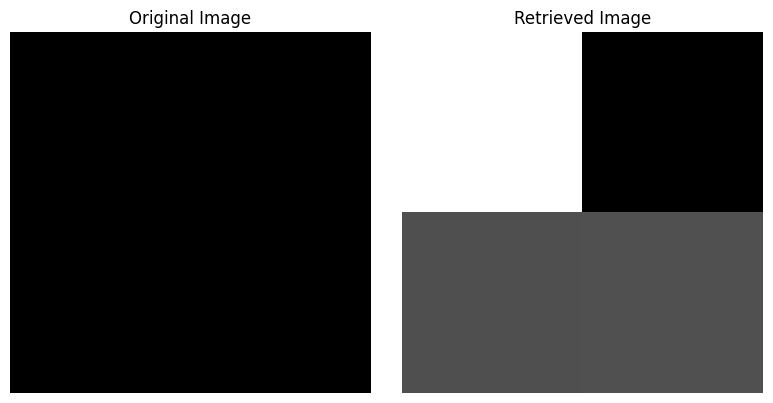

 71%|███████▏  | 5/7 [00:00<00:00,  6.75it/s]

Method: geqie.encodings.frqi, Image: test_image_1010.png


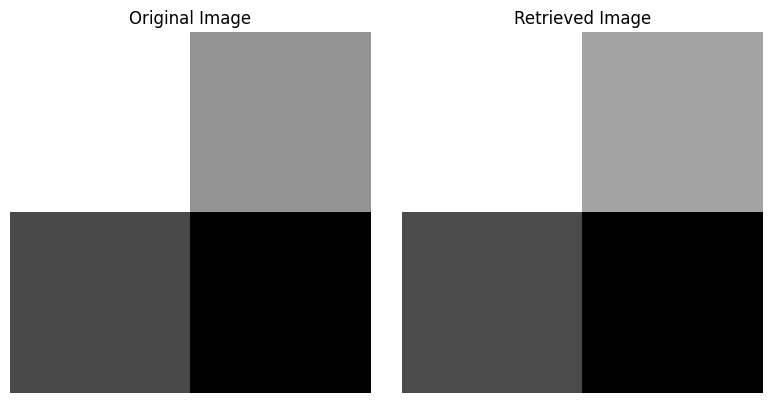

 86%|████████▌ | 6/7 [00:00<00:00,  6.49it/s]

Method: geqie.encodings.frqi, Image: test_image_4x4.png


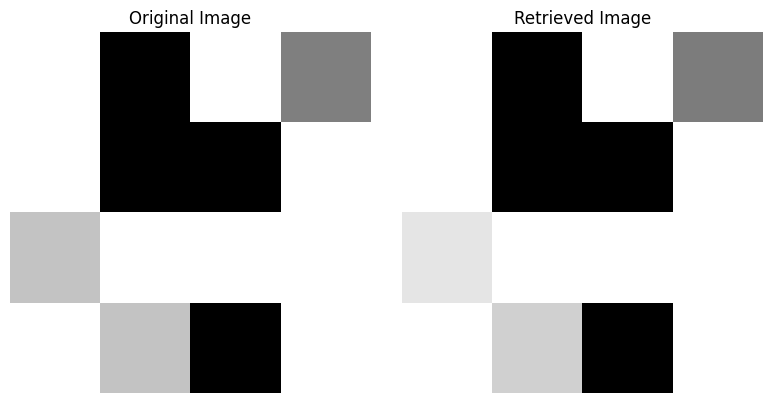

100%|██████████| 7/7 [00:01<00:00,  6.61it/s]


In [20]:
for (method, image_path) in tqdm(list(product(GRAYSCALE_METHODS[:1], GRAYSCALE_IMAGE_PATHS))):
    image = Image.open(image_path)
    image = ImageOps.grayscale(image)
    image = np.asarray(image)

    circuit = geqie.encode(method.init_function, method.data_function, method.map_function, image)
    result = geqie.simulate(circuit, 1024)
    retrieved_image = frqi.retrieve_function(result)

    print(f"Method: {method.__name__}, Image: {image_path.name}")
    plot_images_side_by_side(image, retrieved_image)

    # print(circuit.draw(output="text"))